# TP 2 : Introduction au Machine Learning

## Partie 1 : Perceptron et K-NN

In [205]:
import numpy as np # pour manipuler des valeurs numériques
import pandas as pd # pour manipuler des dataframes
import matplotlib.pyplot as plt # pour afficher des graphiques
import seaborn as sns # graphique spécialement fait pour faire de la data vizualisation

### Q1.

In [206]:
# charger les données
data = pd.read_csv('wine_dataset.csv', sep = ";")
# regarder les 5 premières lignes de data
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


Combien avons-nous de **variables** et d'**exemples** ?

In [207]:
print(data.shape)

(6497, 13)


Le jeu de données contient **6497 exemples** (lignes) et **13 variables** (colonnes)

In [208]:
data = data.drop(columns=['quality'])

### Q2.

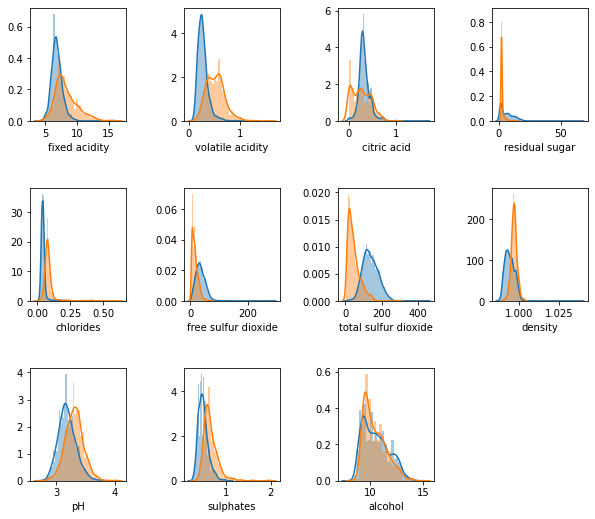

In [209]:
fig = plt.figure(figsize=(10,12))
fig.subplots_adjust(wspace=0.6, hspace=0.6)

for i, col in enumerate(data.columns.drop('color')):
    ax = fig.add_subplot(4,4,i+1)
    g = sns.FacetGrid(data=data, hue='color')
    g.map(sns.distplot, col, ax=ax)
    plt.close()
plt.show()

### Q3.

**Sélection de variables** ("à vue d'oeil") : Il semble raisonnable de sélectionner les variables explicatives `volatile_acidity`, `chlorides`, `free_sulfur_dioxide` et `total_sulfur_dioxide`.

In [210]:
data_reduced = data[['volatile acidity',
                     'chlorides',
                     'free sulfur dioxide',
                     'total sulfur dioxide',
                     'color']] # ne pas oublier notre "y"

Construisons notre base de **test** et notre base d'**apprentissage** :

In [211]:
from sklearn.model_selection import train_test_split
X = data_reduced.drop(columns='color')
y = data_reduced['color']
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Q4.

In [212]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

D'après la documentation de la fonction `train_test_split`, les proporitions des échantillons d'apprentissage et de test sont de 75% - 25%. Faisons une petite vérification :

- train-set :

In [213]:
print(y_train.size / (y_train.size + y_test.size))

0.7498845621055872


- test-set :

In [214]:
print(y_test.size / (y_train.size + y_test.size))

0.2501154378944128


Entraînons une **régression logistique** :

In [215]:
from sklearn.linear_model import LogisticRegression

f = LogisticRegression()
f.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Q5.

Regardons les erreurs d'apprentissage et de test.

**Remarque** : f.score() nous donne la métrique **accuracy** qui est tout simplement la proportion de bonnes prédictions

In [216]:
print("Erreur d\'apprentissage :", 1-f.score(X_train, y_train))
print("Erreur de test :", 1-f.score(X_test, y_test))

Erreur d'apprentissage : 0.03838259441707714
Erreur de test : 0.040000000000000036


In [217]:
print("Score sur le train-set :", f.score(X_train, y_train))
print("Score sur le test-set :", f.score(X_test, y_test))

Score sur le train-set : 0.9616174055829229
Score sur le test-set : 0.96


Dans la suite, on pourra considérer directement le score plutôt que l'erreur.

### Q6.

In [218]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
print("Score sur le test-set :", perceptron.score(X_test, y_test))

Score sur le test-set : 0.92


La régression logistique semble plus performante que le perceptron. Essayons maintenant un k-NN avec $k \in\{1, \cdots, 19\}$ :

Score de test du meilleur prédicteur kNN : 0.9286153846153846


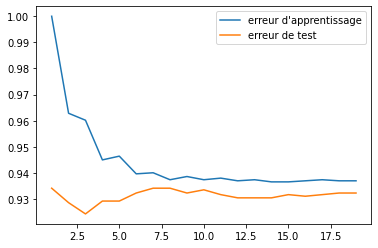

In [219]:
from sklearn.neighbors import KNeighborsClassifier

knn = {}
score_train = []
score_test = []

k_range = range(1,20)

for k in k_range:
    knn[k] =  KNeighborsClassifier(n_neighbors=k)
    knn[k].fit(X_train,y_train)
    score_train.append(knn[k].score(X_train,y_train))
    score_test.append(knn[k].score(X_test,y_test))

k_best = np.argmax(score_test) + 1

print('Score de test du meilleur prédicteur kNN :',score_test[k_best])

plt.plot(list(k_range),score_train,label='erreur d\'apprentissage')
plt.plot(list(k_range),score_test,label='erreur de test')
plt.legend()
plt.show()

le k-NN est plus performant que le perceptron mais moins perfomant que la régression logistique. La régression logistique reste donc pour l'instant imbattable.

### Q7.

**Remarque :**
- 0 = vin blanc
- 1 = vin rouge

In [220]:
pd.crosstab(y_test, f.predict(X_test))

col_0,0,1
color,,
0,1189,27
1,38,371


Dans la matrice de confusion, les lignes correspondent aux étiquettes réelles, et les colonnes aux étiquettes prédites. Pour chaque étiquette prédite, on a le nombre correspondant de chaque étiquette réelle. On remarque remarque qu'en proportition, un vin rouge ($y = 1$) est plus souvent prédit comme vin blanc ($y = 0$) que l'inverse.

### Q8.

In [221]:
from sklearn.utils import resample, shuffle

def balanced_data(X, y):
    # 0 : white
    # 1 : red
    label_counts = y.value_counts()
    X_white = X[y==0]
    y_white = y[y==0]
    X_less_white, y_less_white = resample(X_white,
                                          y_white,
                                          n_samples=label_counts[1],
                                          replace=False)
    X_ = pd.concat([X_less_white, X[y==1]])
    y_ = pd.concat([y_less_white, y[y==1]])
    X_, y_ = shuffle(X_,y_)
    return(X_, y_)

X_test_, y_test_ = balanced_data(X_test, y_test)
print(y_test_.value_counts())

1    409
0    409
Name: color, dtype: int64


### Q9.

In [222]:
print('Régression logistique :', f.score(X_test_, y_test_))
print('Peceptron :', perceptron.score(X_test_, y_test_))
print('Meilleur kNN :',knn[k_best].score(X_test_, y_test_))

Régression logistique : 0.9376528117359413
Peceptron : 0.8471882640586798
Meilleur kNN : 0.9095354523227384


Lorsque l'échantillon de test contient autant de vins rouges que de vins blancs, le score de chaque prédicteur est inférieur.

### Q10.

In [223]:
X_train_, y_train_ = balanced_data(X_train, y_train)
print(y_train_.value_counts())

1    1190
0    1190
Name: color, dtype: int64


In [224]:
f_ = LogisticRegression()
f_.fit(X_train_, y_train_)
print('Régression logistique:', f_.score(X_test_,y_test_))

perceptron_ = Perceptron()
perceptron_.fit(X_train_,y_train_)
print('Perceptron:', perceptron_.score(X_test_,y_test_))

knn_ = {}
score_train = []
score_test = []
k_range = range(1, 20)
for k in k_range:
    knn_[k] =  KNeighborsClassifier(n_neighbors=k)
    knn_[k].fit(X_train_,y_train_)
    score_test.append(knn_[k].score(X_test_,y_test_))
k_best = np.argmax(score_test)
print('Meilleur kNN:', score_test[k_best])

Régression logistique: 0.9572127139364304
Perceptron: 0.7237163814180929
Meilleur kNN: 0.89119804400978


Même si on a réduit la taille de l'échantillon d'apprentissage, du fait que celui-ci contienne autant de vins rouges que de vins blancs, on observe une légère amélioration des scores des prédicteurs obtenus.

### Q11.

In [225]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(data.drop(columns='color'),
                                                    data['color'])

X_train_, y_train_ = balanced_data(X_train_all, y_train_all)
X_test_, y_test_ = balanced_data(X_test_all, y_test_all)

f_ = LogisticRegression()
f_.fit(X_train_, y_train_)
print('Régression logistique:',f_.score(X_test_,y_test_))

perceptron_ = Perceptron()
perceptron_.fit(X_train_,y_train_)
print('Perceptron', perceptron_.score(X_test_,y_test_))

knn_ = {}
score_train = []
score_test = []
k_range = range(1,20)
for k in k_range:
    knn_[k] =  KNeighborsClassifier(n_neighbors=k)
    knn_[k].fit(X_train_,y_train_)
    score_test.append(knn_[k].score(X_test_,y_test_))
k_best = np.argmax(score_test)
print('Meilleur kNN', score_test[k_best])

/Users/Faugon/opt/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Régression logistique: 0.9675675675675676
Perceptron 0.9472972972972973
Meilleur kNN 0.9283783783783783


On observe une amélioration de tous les prédicteurs (régression logistique, kNN, et perceptron). Il est à noter que la performance du perceptron devient meilleur que les k-NN

## Partie 2 : K-NN et Validation croisée

Chargeons tout d'abord le jeu de données :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

print(X[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


Modifions l'image de sorte à avoir un array de dimension 2 de taille 8x8 :

In [3]:
print(X[1].reshape(8,8))

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


Voici à quoi cela ressemble avec des jeux de couleur

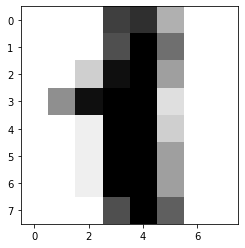

In [4]:
plt.figure()
plt.imshow(X[1].reshape(8,8),cmap=plt.cm.gray_r)
plt.show()

### Q12.

In [5]:
for i in range(0,10):
    print('Chiffre',i,':', sum(y==i))

Chiffre 0 : 178
Chiffre 1 : 182
Chiffre 2 : 177
Chiffre 3 : 183
Chiffre 4 : 181
Chiffre 5 : 182
Chiffre 6 : 181
Chiffre 7 : 179
Chiffre 8 : 174
Chiffre 9 : 180


Les classes sont à peu près équilibrées.

### Q13.

In [6]:
from sklearn.model_selection import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, train_size=200)

### Q14.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_cv, y_cv, cv=7)

print(scores)

[0.89655172 0.96551724 0.93103448 0.96551724 0.89285714 0.96428571
 0.85714286]


`scores` contient les scores de validation pour chacun des 7 couples d'échantillons apprentissage/validation considérés par la 7-CV. Le score final de la 7-CV est donc la moyenne de ces 7 scores.

In [13]:
print("Score de validation de la 7-CV de l'algorithme 5NN: ",  np.mean(scores))

Score de validation de la 7-CV de l'algorithme 5NN:  0.9247009148486981


### Q15.

In [9]:
from sklearn.model_selection import validation_curve
k_range = range(1,21)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(),
                                              X_cv,
                                              y_cv,
                                              "n_neighbors",
                                              k_range,
                                              cv=7)

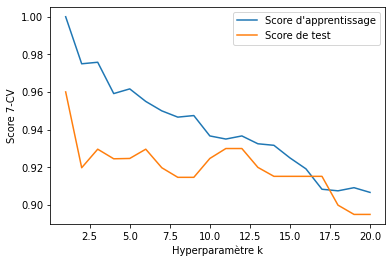

In [10]:
train_mean_score = np.mean(train_scores,axis=1)
valid_mean_score = np.mean(valid_scores,axis=1)

plt.plot(k_range, train_mean_score, label='Score d\'apprentissage')
plt.plot(k_range, valid_mean_score, label='Score de test')
plt.xlabel("Hyperparamètre k")
plt.ylabel("Score 7-CV")
plt.legend()
plt.show()

In [12]:
k_best = k_range[np.argmax(valid_mean_score)]
k_best

1

Pour les grandes valeurs de k considérées, on voit que les scores d'apprentissage et de test décroissent toutes les deux lorsque k croît. De plus, on sait que le biais de l'algorithme kNN augmente lorsque k croît. On en déduit qu'il y a sous-apprentissage (underfitting) pour les grandes valeurs de k. Il est donc inutile de considérer des valeurs k encore plus grandes.

### Q16.

In [14]:
from sklearn.model_selection import learning_curve

train_size_range = range(10,151,5)
train_sizes, train_scores, valid_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=k_best),
    X_cv,y_cv,train_sizes=train_size_range,
    cv=7)

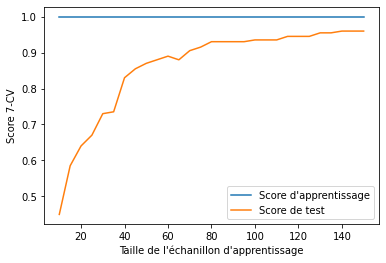

In [15]:
train_mean_score = np.mean(train_scores,axis=1)
valid_mean_score = np.mean(valid_scores,axis=1)

plt.plot(train_sizes, train_mean_score, label='Score d\'apprentissage')
plt.plot(train_sizes, valid_mean_score, label='Score de test')
plt.xlabel("Taille de l'échanillon d'apprentissage")
plt.ylabel("Score 7-CV")
plt.legend()
plt.show()

On voit que la courbe de score de test atteint ici un plateau (les résultats peuvent varier). Il est donc inutile de considérer des échantillons d'apprentissage plus grands.

### Q17.

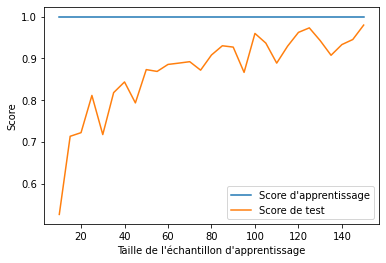

In [16]:
import numpy as np

knn_dict = {}
score_train = []
score_test = []

for size in train_size_range:
    X_train_,X_test_,y_train_,y_test_ = train_test_split(X_cv,y_cv,train_size=size)
    knn_dict[size] = KNeighborsClassifier(n_neighbors=k_best).fit(X_train_,y_train_)
    score_train.append(knn_dict[size].score(X_train_,y_train_))
    score_test.append(knn_dict[size].score(X_test_,y_test_))

plt.plot(train_size_range, score_train, label='Score d\'apprentissage')
plt.plot(train_size_range, score_test, label='Score de test')
plt.xlabel("Taille de l'échantillon d'apprentissage")
plt.ylabel("Score")
plt.legend()
plt.show()

Le score de la validation croisée est obtenue par la moyenne de plusieurs (ici 7) scores de validation simple. Elle présente donc beaucoup moins de fluctuations, et permet, ici pour la lecture des courbes d'apprentissage, de mieux saisir le comportement des courbes.

### Q18.

In [17]:
knn_best = KNeighborsClassifier(n_neighbors=k_best).fit(X_cv,y_cv)
print('Score :',knn_best.score(X_test,y_test))

Score : 0.9442705072010019


In [18]:
import pandas as pd
pd.crosstab(y_test,knn_best.predict(X_test))

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,159,0,0,0,1,0,0,0,0,0
1,0,156,0,0,0,0,0,0,2,1
2,1,3,153,1,0,0,0,1,3,0
3,0,0,0,150,0,1,0,1,3,4
4,0,4,0,0,151,0,0,1,2,0
5,0,0,0,1,1,155,1,0,0,3
6,1,0,0,0,0,0,159,0,1,0
7,0,0,0,0,0,0,0,160,2,0
8,0,4,0,8,0,0,0,1,138,0


L'erreur la plus courante est ici le 3 qui est pris pour un 8 (les résultats peuvent varier).

### Q19.

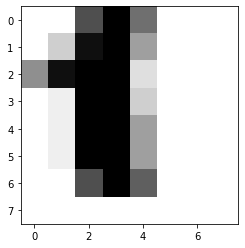

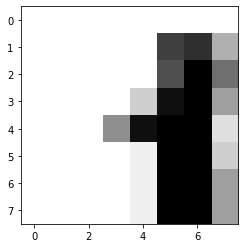

In [20]:
def shift_image(image,direction):
    dx, dy = direction
    x_shifted_image = np.zeros((8,8))
    if dx > 0:
        x_shifted_image[:,dx:] = image[:,:-dx]
    elif dx < 0:
        x_shifted_image[:,:dx] = image[:,-dx:]
    else:
        x_shifted_image = image 
    xy_shifted_image = np.zeros((8,8))
    if dy > 0:
        xy_shifted_image[:-dy] = x_shifted_image[dy:]
    elif dy < 0:
        xy_shifted_image[-dy:] = x_shifted_image[:dy]
    else:
        xy_shifted_image = x_shifted_image
    return xy_shifted_image

plt.figure()
plt.imshow(shift_image(X[1].reshape(8,8),np.array([-1,1])),cmap=plt.cm.gray_r)
plt.show()

plt.figure()
plt.imshow(shift_image(X[1].reshape(8,8),np.array([2,-1])),cmap=plt.cm.gray_r)
plt.show()

### Q20.

In [21]:
X_augmented = np.empty((0,64))
y_augmented = np.empty((0,1))

foo = [-1,0,1]
for dx in foo:
    for dy in foo:
        X_augmented = np.append(X_augmented,[shift_image(x.reshape(8,8),np.array([dx,dy])).reshape(64) for x in X],axis=0)
        y_augmented = np.append(y_augmented,y)

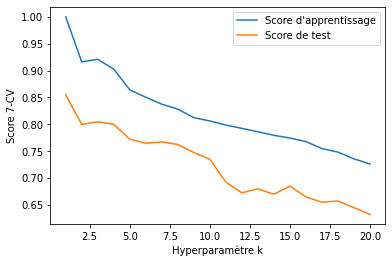

In [22]:
X_augmented_train, X_augmented_test, y_augmented_train, y_augmented_test = train_test_split(X_augmented,y_augmented,train_size=400)

from sklearn.model_selection import validation_curve
k_range = range(1,21)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(),
                                              X_augmented_train,
                                              y_augmented_train,
                                              "n_neighbors",
                                              k_range,
                                              cv=7)

train_mean_score = np.mean(train_scores,axis=1)
valid_mean_score = np.mean(valid_scores,axis=1)

plt.plot(k_range, train_mean_score, label='Score d\'apprentissage')
plt.plot(k_range, valid_mean_score, label='Score de test')
plt.xlabel("Hyperparamètre k")
plt.ylabel("Score 7-CV")
plt.legend()
plt.show()

k_best = k_range[np.argmax(valid_mean_score)]

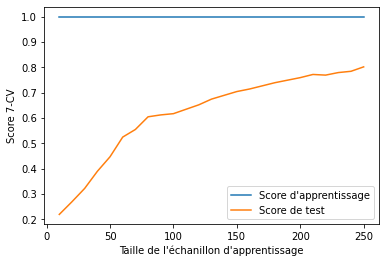

In [23]:
train_size_range = range(10,251,10)
train_sizes, train_scores, valid_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=k_best),
    X_augmented_train,y_augmented_train,train_sizes=train_size_range,
    cv=7)

train_mean_score = np.mean(train_scores,axis=1)
valid_mean_score = np.mean(valid_scores,axis=1)

plt.plot(train_sizes, train_mean_score, label='Score d\'apprentissage')
plt.plot(train_sizes, valid_mean_score, label='Score de test')
plt.xlabel("Taille de l'échanillon d'apprentissage")
plt.ylabel("Score 7-CV")
plt.legend()
plt.show()

Le score d'apprentissage reste très élevé. Le score de test est nettement inférieur, continue d'augmenter avec avec la taille de l'échantille d'apprentissage. On est donc en situation de sur-apprentissage (overfitting). Il serait intéressant d'augmenter la taille de l'échantillon d'apprentissage. Travaillons avec un échantillon d'apprentissage/validation de taille 15000.

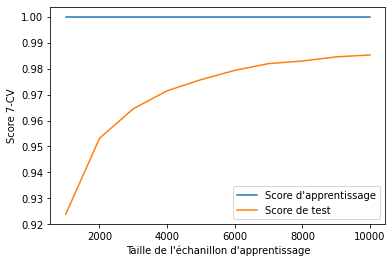

In [24]:
X_augmented_train, X_augmented_test, y_augmented_train, y_augmented_test = train_test_split(X_augmented,y_augmented,train_size=15000)

train_size_range = range(1000,10001,1000)
train_sizes, train_scores, valid_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=k_best),
    X_augmented_train,y_augmented_train,train_sizes=train_size_range,
    cv=7)

train_mean_score = np.mean(train_scores,axis=1)
valid_mean_score = np.mean(valid_scores,axis=1)

plt.plot(train_sizes, train_mean_score, label='Score d\'apprentissage')
plt.plot(train_sizes, valid_mean_score, label='Score de test')
plt.xlabel("Taille de l'échanillon d'apprentissage")
plt.ylabel("Score 7-CV")
plt.legend()
plt.show()

La courbe du score de test semble (presque) atteindre un plateau. Il semble donc que nous ayons un échantillon d'apprentissage/validation suffisamment grand. Cronstruisons à présent notre estimateur kNN sur l'ensemble de cet échantillon, et examions son score sur l'échantillon de test.

In [25]:
print('Score :',KNeighborsClassifier(n_neighbors=k_best).fit(X_augmented_train,y_augmented_train).score(X_augmented_test,y_augmented_test))

Score : 0.9829497016197783


Le prédicteur obtenu est meilleur.